In [13]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
# File system manangement
import os
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn import metrics


import numpy as np
import pandas as pd
from time import time 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
import math
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [14]:
def read_dataset(name,separator):
    data = pd.read_csv(name, sep=separator)
    return data

def one_hot_encoder(df):
    le = LabelEncoder()
    le_count = 0
    # Iterate through the columns
    for col in df:
        if df[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(df[col].unique())) <= 2:
                # Train on the training data
                le.fit(df[col])
                # Transform both training and testing data
                df[col] = le.transform(df[col])            
                # Keep track of how many columns were label encoded
                le_count += 1
    print('%d columns were label encoded.' % le_count)
    # one-hot encoding of categorical variables
    df = pd.get_dummies(df)
    print('Training Features shape: ', df.shape)
    return(df)

def outliers_removal(data):
        # For each feature find the data points with extreme high or low values
    for feature in data.keys():
        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(data[feature], q=25)
        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(data[feature], q=75)
        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        interquartile_range = Q3 - Q1
        step = 1.5 * interquartile_range
        # Display the outliers
        print("Data points considered outliers for the feature '{}':".format(feature))
        display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers = []
    # Remove the outliers, if any were specified
    good_data = data.drop(data.index[outliers]).reset_index(drop = True)
    return good_data

#def remove_colinear_data():
def remove_unique_feature(df):
    i = 0
    features_list = df.columns
    while i < len(features_list):
        if len(df[features_list[i]].unique()) == 1:
            print('dropping: ',features_list[i])
            df.drop(features_list[i], 1, inplace=True)
        i += 1
    return df
#def eliminate_low_importance():
#def perform_PCA()
    
def missing_values(df,policy):
    i = 0
    features_list = df.columns
    print(len(features_list))
    while i < len(features_list):
        if df[features_list[i]].isnull().sum() != 0:
            print('treating feature: ',features_list[i])
            if policy == 'drop':
                df.drop(features_list[i], 1, inplace=True)
            elif policy == 'forwardfill':
                df[features_list[i]].fillna(method='ffill')
            elif policy == 'backwardfill':
                df[features_list[i]].fillna(method='bfill')
            elif policy == 'median_fill':
                df[features_list[i]].fillna(df[features_list[i]].mean())
        i += 1
    print('treatment is over')
    return df

def features_importance(data,information_import,target):
    data_np = data.astype(np.int32).values
    X = data_np[:,:-1]
    y = data_np[:,-1]
    model = ExtraTreesClassifier()
    model.fit(X,y)
# display the relative importance of each attribute
    sorted_features = np.sort(model.feature_importances_)[::-1].tolist()
    sum_info = 0
    i = 0
    while i < len(sorted_features):
        if sum_info < information_import:
            sum_info = sum_info+sorted_features[i]
        elif sum_info > information_import:
            break
        i += 1
    model = LogisticRegression()
# create the RFE model and select 3 attributes
    rfe = RFE(model, i)
    rfe = rfe.fit(X,y)
    # summarize the selection of the attributes
    rank = rfe.ranking_.tolist()
    i = 0
    features_index = []
    while i < len(rank):
        if rank[i] == 1:
            features_index.append(i)
        i += 1
    best_features = []
    for index in features_index:
        best_features.append(data.columns[index])
    best_features.append(target)
    print('most significant features', best_features)
    return best_features

def remove_colinar_features(target,local_threshold,best_features):
    corr_matrix = data[best_features].corr().abs()
    i = 0
    local_threshold = 0.2
    features_to_keep = []
    correlation_target = corr_matrix[target].values.tolist()
    while i < len(correlation_target):
        if correlation_target[i] >= local_threshold:
            features_to_keep.append(data.columns[i])
        i += 1
    print(features_to_keep)

    corr_matrix = data[features_to_keep].corr().abs()
    print(corr_matrix)
    i = 0
    while i < len(features_to_keep):
        corr_matrix = data[features_to_keep].corr().abs()
        print(corr_matrix[features_to_keep[i]])
        correlation_target = corr_matrix[features_to_keep[i]].values.tolist()
        print(correlation_target)
        j = 0
        while j < len(correlation_target):
            if float(correlation_target[j]) > 0.5 and float(correlation_target[j]) < 1.0:
                corr_matrix = data[features_to_keep].corr().abs()
                print('current feature '+features_to_keep[i])
                features_to_keep.remove(features_to_keep[j])
            j += 1
        i += 1
    features_to_keep.append(target)
    print(features_to_keep)
    return(features_to_keep)


def broad_analysis(data):
    print('shape of the dataset: ',data.shape)
    print(data.columns)
    print('First five rows')
    print(display(data.head(n=5)))
    print('first last rows')
    print(display(data.tail(n=5)))
    print('five random samples')
    print(display(data.sample(n=5)))
    print('looking for null values')
    print(data.isnull().any())
    print('generic infos about the dataset')
    print(data.info())

def tendancy_indicators(dataframe,feature):
    print('average value mean = ',dataframe[feature].mean())
    print('middle value: mediane = ',dataframe[feature].median())
    print('value that appears the most: mode = ',dataframe[feature].mode())
    print('value of the variance: variance = ',dataframe[feature].var(ddof=0))
    print('value of the standard deviation: std = ',dataframe[feature].std(ddof=0))
    print('value of the skewnesse: skew = ',dataframe[feature].skew())
    if dataframe[feature].skew() == 0:
        print('symetrical distribution')
    elif dataframe[feature].skew() > 0:
        print('spreading to the left')
    else:
        print('spreading to the right')
    print('value of the kurtosis: kurtosis = ',dataframe[feature].kurtosis())
    if dataframe[feature].kurtosis() == 3:
        print('normal distribution')
    elif dataframe[feature].kurtosis() > 3:
        print('values are concentrated')
    else:
        print('values are not concentrated')
    
def data_relation(data,size):
    pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = size, diagonal = 'kde')
    plt.show()
    correlation = data.corr()
    plt.figure(figsize=size)
    heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
    
def specific_correlation(feature1,feature2): 
    #Visualize the co-relation between quantitative variables
    #Create a new dataframe containing only two columns to visualize their co-relations
    feature1_feature2 = data[[feature1, feature2]]
    #Initialize a joint-grid with the dataframe, using seaborn library
    gridA = sns.JointGrid(x=feature2, y=feature1, data=feature1_feature2, size=6)
    #Draws a regression plot in the grid 
    gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
    #Draws a distribution plot in the same grid
    gridA = gridA.plot_marginals(sns.distplot)

def specific_correlation_quantitative(feature1,feature2,title,size):
    fig, axs = plt.subplots(ncols=1,figsize=size)
    feature1_feature2 = data[[feature1, feature2]]
    sns.barplot(x=feature1, y=feature2, data=feature1_feature2, ax=axs)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()


#PCA
def value_repetition(df):
    i = 0
    counter = len(df)
    data_count = {str(df[0]): 1}
    while i < counter:
        if str(df[i]) in data_count:
            data_count[str(df[i])] += 1
        else:
            data_count[str(df[i])] = 1  
        i += 1
    return(data_count)
#function that counts how often a same value is repeated in the dataset
#this function will return the result as a dictionnary giving for each distinct value in the dataset the number of times it appears

def data_distribution(rows):
    parameter = []
    value = []
    i = 0
    while i < len(rows):
        parameter.append(rows[i])
        value.append(len(df[rows[i]].value_counts()))
        l1, l2 = parameter,value
        output_dictionnary = dict(zip(l1, l2))
        i += 1
    return(output_dictionnary)
#function that counts and create a dictionnary containing for each features the number of different values


def data_distribution_plot(output_dictionnary, x_label, y_label ,graph_title):
    plt.bar(range(len(output_dictionnary)), output_dictionnary.values(), align='center',color='g')
    plt.xticks(range(len(output_dictionnary)), list(output_dictionnary.keys()))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_title)
    plt.show()
#function that creates a plot showing the distribution of the features

def PCA_generator(df):
    i = 0
    j = 0
    size = len(df.columns)
    X = df.values
    X_std = StandardScaler().fit_transform(X)
# Clculating Eigenvectors and eigenvalues of Cov matirx
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
    print('Covariance matrix \n%s' %cov_mat)
    cov_mat = np.cov(X_std.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    print('Eigenvectors \n%s' %eig_vecs)
    print('\nEigenvalues \n%s' %eig_vals)
# Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
 #  Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
    print('Eigenvalues in descending order:')
    for i in eig_pairs:
        print(i[0])
    tot = sum(eig_vals)
    var_exp_sorted = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp_sorted = np.cumsum(var_exp_sorted)
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(size, 4))
        plt.bar(range(size), var_exp_sorted, alpha=0.5, align='center', label='individual explained variance')
        plt.step(range(size), cum_var_exp_sorted, where='mid', label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
    pca = PCA(n_components=size)
    pca.fit(X_std)
    print('variance ratio ',pca.explained_variance_ratio_) 
    #print('singular values ',pca.singular_values_) 

#This function will output both 2d and 3d graphs of the PCA that was performed on the data
#it give a visual display of the correlation between the variables as well as the influence of each variable to the given component

def pca_components(df, nb_components):
    X = df.values
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    pca = decomposition.PCA(n_components=nb_components)
    pca.fit(X_scaled) 
    print (pca.explained_variance_ratio_)
    print (pca.explained_variance_ratio_.sum())
    X_projected = pca.transform(X_scaled)  
    pcs = pca.components_

#statistical tools
def qualitative_representation(feature,x_axis):
# VARIABLE QUALITATIVE
    df[feature].value_counts(normalize=True).plot(kind='pie')
    plt.axis(x_axis) 
    plt.show() # Affiche le graphique
    df[feature].value_counts(normalize=True).plot(kind='bar')
    plt.show()

def quantitative_representation(feature1,feature2,bucket_value,sample_size):
    bin_numebr = 1 + math.log2(sample_size)
    print('bin_number: ',bin_number)
    df[feature1].value_counts(normalize=True).plot(kind='bar',width=0.1)
    plt.show()
    df[feature2].hist(normed=True)
    plt.show()
    df[df.feature2.abs() < bucket_value][feature2].hist(normed=True,bins=bin_number)
    plt.show()

def array_representation(feature):
    effectifs = df[feature].value_counts()
    modalites = effectifs.index 
    tab = pd.DataFrame(modalites, columns = [feature]) 
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(df) 


#probabilistic tools
#indicators

def create_set(df,target):
    X = df.drop(target,axis=1)
    y = df[target]
    y = df[target].values.tolist()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaler.fit(X_train)
    StandardScaler(copy=True, with_mean=True, with_std=True)
    X = scaler.transform(X)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_val = scaler.transform(X_val)



In [15]:
data = read_dataset('train.csv',',')
data = data[['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40','Cover_Type']]
target = 'Cover_Type'
#remove unique
print("========================================")
print("========================================")
print('removing features containing only one value')
remove_unique_feature(data)
print("========================================")
print("========================================")
print('removing duplicates')
data = data.drop_duplicates()
print("========================================")
print("========================================")
#treat missing value
print("========================================")
print("========================================")
print('treating features containing missing values')
missing_values(data,'drop')
print("========================================")
print("========================================")
#remove outliers
print("========================================")
print("========================================")
print('removing outliers from each feature')
outliers_removal(data)
print("========================================")
print("========================================")
#selecting most important features
print("========================================")
print("========================================")
print('Keeping most relevant features')
best_features = features_importance(data,0.8,target)
print("========================================")
print("========================================")
print('keeping most correlated features and removing features correlated to each other')
features_to_keep = remove_colinar_features(target,0.2,best_features)

removing features containing only one value
dropping:  Soil_Type7
dropping:  Soil_Type15
removing duplicates
treating features containing missing values
53
treatment is over
removing outliers from each feature
Data points considered outliers for the feature 'Elevation':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


Data points considered outliers for the feature 'Aspect':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


Data points considered outliers for the feature 'Slope':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1411,2773,80,48,124,112,134,226,107,0,1298,...,0,0,0,0,0,0,0,0,0,5
1416,2779,78,47,134,118,150,227,111,0,1318,...,0,0,0,0,0,0,0,0,0,5
1419,2786,76,46,150,132,162,226,113,0,1338,...,0,0,0,0,0,0,0,0,0,5
1423,2743,76,49,134,81,150,222,103,0,1337,...,0,0,0,0,0,0,0,0,0,5
1427,2803,74,46,175,141,190,224,111,0,1379,...,0,0,0,0,0,0,0,0,0,5
1431,2760,75,49,170,95,175,219,99,0,1379,...,0,0,0,0,0,0,0,0,0,5
1439,2828,72,45,228,163,234,223,113,0,1443,...,0,0,0,0,0,0,0,0,0,5
1444,2789,74,49,201,35,218,219,99,0,1445,...,0,0,0,0,0,0,0,0,0,5
1449,2824,93,45,190,45,268,240,130,0,1510,...,0,0,0,0,0,0,0,0,0,5
1454,2827,84,46,162,26,283,233,119,0,1533,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Horizontal_Distance_To_Hydrology':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
206,3172,50,11,759,0,4287,225,215,123,2037,...,0,0,0,0,0,0,0,0,0,1
217,3201,10,13,984,180,4136,205,213,143,2289,...,0,0,0,0,0,0,0,0,0,1
236,3244,326,5,750,53,3730,207,234,166,2460,...,0,0,0,0,0,0,0,0,0,1
237,3237,27,14,997,36,4002,213,210,130,2506,...,0,0,0,0,0,0,0,0,0,1
243,3047,90,3,870,128,5484,224,234,146,5635,...,0,0,0,0,0,0,0,0,0,2
248,3027,152,10,792,108,5316,233,240,138,5912,...,0,0,0,0,0,0,0,0,0,2
255,3018,109,10,815,132,5833,238,229,121,5486,...,0,0,0,0,0,0,0,0,0,2
256,3011,85,5,842,85,5389,228,231,137,5975,...,0,0,0,0,0,0,0,0,0,2
258,3004,135,7,811,78,5383,231,237,138,6017,...,0,0,0,0,0,0,0,0,0,2
260,3260,128,11,743,46,3824,238,233,124,2854,...,0,0,0,0,0,0,0,0,0,1


Data points considered outliers for the feature 'Vertical_Distance_To_Hydrology':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
197,3077,256,4,618,210,6230,210,242,170,3734,...,0,0,0,0,0,0,0,0,0,2
708,2931,4,12,579,215,3018,204,218,150,1621,...,0,0,0,0,0,0,0,0,0,2
723,2975,38,11,633,245,3282,220,216,129,1381,...,0,0,0,0,0,0,0,0,0,2
1218,2871,67,22,600,197,626,236,192,77,2391,...,0,0,0,0,0,0,0,0,0,5
1283,2865,85,15,400,193,430,240,213,99,1863,...,0,0,0,0,0,0,0,0,0,5
1414,2847,50,27,323,199,335,220,172,70,1482,...,0,0,0,0,0,0,0,0,0,2
1430,2899,35,18,430,240,443,215,198,113,1602,...,0,0,0,0,0,0,0,0,0,2
1433,2856,53,28,335,195,350,223,169,63,1530,...,0,0,0,0,0,0,0,0,0,5
1528,2795,80,31,270,-134,306,243,168,31,2012,...,0,0,0,0,0,0,0,0,0,5
1596,2784,87,31,240,-110,242,247,173,31,2467,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Horizontal_Distance_To_Roadways':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,2
21,2880,209,17,216,30,4986,206,253,179,4323,...,0,0,0,0,0,0,0,0,0,2
27,2962,148,16,323,23,5916,240,236,120,3395,...,0,0,0,0,0,0,0,0,0,2
35,2900,45,19,242,20,5199,221,195,100,4115,...,0,0,0,0,0,0,0,0,0,2
61,2952,107,11,42,7,5845,239,226,116,3509,...,0,0,0,0,0,0,0,0,0,2
67,2919,13,13,90,6,5321,207,214,142,4060,...,0,0,0,0,0,0,0,0,0,1
71,3008,45,14,277,10,6371,223,208,116,3036,...,0,0,0,0,0,0,0,0,0,2
72,2893,114,16,108,30,5066,245,223,102,4340,...,0,0,0,0,0,0,0,0,0,2
73,2850,6,9,0,0,4858,210,223,151,4548,...,0,0,0,0,0,0,0,0,0,2
75,2864,118,18,201,74,4567,248,221,93,4849,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Hillshade_9am':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
124,2847,320,33,85,39,4983,120,190,199,4727,...,0,0,0,0,0,0,0,0,0,2
167,2860,276,33,60,33,5292,115,226,240,4759,...,0,0,0,0,0,0,0,0,0,2
718,2920,316,29,433,186,3511,133,202,203,1265,...,0,0,0,0,0,0,0,0,0,2
884,2975,354,40,474,0,4118,126,141,132,2250,...,0,0,0,0,0,0,0,0,0,2
1889,2533,322,29,85,36,828,134,197,196,323,...,0,1,0,0,0,0,0,0,0,6
1892,2922,272,31,799,547,875,123,231,238,2136,...,0,0,0,0,0,0,0,0,0,2
1902,2597,321,28,192,105,806,136,199,196,361,...,0,1,0,0,0,0,0,0,0,6
1930,2113,251,33,150,105,247,131,241,235,127,...,0,0,0,0,0,0,0,0,0,3
1950,2027,272,37,60,26,150,100,222,246,180,...,0,0,0,0,0,0,0,0,0,3
1954,2847,291,36,743,354,934,101,209,236,1879,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Hillshade_Noon':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
478,3014,5,31,95,54,4950,165,164,123,3973,...,0,0,0,0,0,0,0,0,0,1
504,2646,9,33,60,9,1771,165,156,112,1518,...,0,0,0,0,0,0,0,0,0,2
884,2975,354,40,474,0,4118,126,141,132,2250,...,0,0,0,0,0,0,0,0,0,2
1233,2765,53,29,313,92,323,221,163,56,2026,...,0,0,0,0,0,0,0,0,0,5
1240,2786,53,29,335,107,350,221,163,56,2001,...,0,0,0,0,0,0,0,0,0,5
1258,2803,57,32,323,136,342,223,157,45,1851,...,0,0,0,0,0,0,0,0,0,5
1268,2799,52,29,300,127,323,220,164,59,1812,...,0,0,0,0,0,0,0,0,0,5
1280,2738,63,33,134,64,162,228,154,33,1613,...,0,0,0,0,0,0,0,0,0,5
1287,2774,58,30,190,96,212,225,164,51,1624,...,0,0,0,0,0,0,0,0,0,5
1289,2771,56,30,175,88,190,224,163,53,1587,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Hillshade_3pm':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1301,2767,73,36,134,91,150,234,147,12,1500,...,0,0,0,0,0,0,0,0,0,5
1304,2773,74,36,150,92,153,236,149,13,1495,...,0,0,0,0,0,0,0,0,0,5
1375,2806,76,39,234,119,255,235,141,0,1371,...,0,0,0,0,0,0,0,0,0,5
1411,2773,80,48,124,112,134,226,107,0,1298,...,0,0,0,0,0,0,0,0,0,5
1416,2779,78,47,134,118,150,227,111,0,1318,...,0,0,0,0,0,0,0,0,0,5
1419,2786,76,46,150,132,162,226,113,0,1338,...,0,0,0,0,0,0,0,0,0,5
1423,2743,76,49,134,81,150,222,103,0,1337,...,0,0,0,0,0,0,0,0,0,5
1424,2728,62,29,108,72,124,230,166,0,1315,...,0,0,0,0,0,0,0,0,0,5
1427,2803,74,46,175,141,190,224,111,0,1379,...,0,0,0,0,0,0,0,0,0,5
1431,2760,75,49,170,95,175,219,99,0,1379,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Horizontal_Distance_To_Fire_Points':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Wilderness_Area1':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Wilderness_Area2':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
9308,3007,323,5,124,0,722,207,235,166,1507,...,0,0,0,0,0,0,0,0,0,1
9339,2981,297,10,30,4,750,193,237,184,1200,...,0,0,0,0,0,0,0,0,0,1
9448,3056,356,6,283,27,1001,210,229,157,1224,...,0,0,0,0,0,0,0,0,0,2
9449,3066,271,10,180,26,765,195,243,188,1865,...,0,0,0,0,0,0,0,0,0,1
9457,3066,277,9,175,6,785,195,242,187,1860,...,0,0,0,0,0,0,0,0,0,1
9466,3065,10,9,180,31,1091,210,221,148,1500,...,0,0,0,0,0,0,0,0,0,2
9490,3086,291,6,458,57,949,203,239,175,1100,...,0,0,0,0,0,0,0,0,0,2
9529,3063,315,2,534,109,792,214,237,161,875,...,0,0,0,0,0,0,0,0,0,2
9556,3072,334,9,0,0,1084,199,228,168,1740,...,0,0,0,0,0,0,0,0,0,1
9578,3091,74,3,180,6,1337,224,233,144,1505,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Wilderness_Area3':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


Data points considered outliers for the feature 'Wilderness_Area4':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


Data points considered outliers for the feature 'Soil_Type1':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1911,2173,50,28,124,100,212,219,167,64,552,...,0,0,0,0,0,0,0,0,0,3
1951,2161,113,32,458,142,524,254,188,34,390,...,0,0,0,0,0,0,0,0,0,3
1968,2110,54,25,342,150,390,225,177,71,466,...,0,0,0,0,0,0,0,0,0,3
1979,2206,65,33,210,144,201,229,155,31,361,...,0,0,0,0,0,0,0,0,0,3
1982,2132,73,27,365,172,408,239,179,53,488,...,0,0,0,0,0,0,0,0,0,3
1989,2162,166,33,277,143,543,226,230,107,242,...,0,0,0,0,0,0,0,0,0,3
1998,2143,170,32,247,124,547,223,234,116,258,...,0,0,0,0,0,0,0,0,0,3
2013,2129,197,33,242,110,598,191,245,164,324,...,0,0,0,0,0,0,0,0,0,3
2014,2151,177,23,295,134,481,224,245,140,430,...,0,0,0,0,0,0,0,0,0,3
2015,2077,99,26,285,117,331,252,194,54,518,...,0,0,0,0,0,0,0,0,0,3


Data points considered outliers for the feature 'Soil_Type2':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1959,2223,294,21,212,151,108,156,230,212,511,...,0,0,0,0,0,0,0,0,0,3
2011,2223,287,6,301,26,30,202,240,177,361,...,0,0,0,0,0,0,0,0,0,3
2232,1906,356,20,150,55,120,184,201,151,726,...,0,0,0,0,0,0,0,0,0,6
2233,1888,33,22,150,46,108,209,185,103,735,...,0,0,0,0,0,0,0,0,0,6
2234,1863,37,17,120,18,90,217,202,115,769,...,0,0,0,0,0,0,0,0,0,6
2247,2208,135,10,120,12,85,236,236,130,277,...,0,0,0,0,0,0,0,0,0,3
2248,2199,200,22,60,15,277,206,253,171,426,...,0,0,0,0,0,0,0,0,0,3
2254,1898,34,23,175,56,134,210,184,99,765,...,0,0,0,0,0,0,0,0,0,6
2276,1916,24,25,212,74,175,197,177,105,789,...,0,0,0,0,0,0,0,0,0,6
2335,2227,170,12,258,91,85,229,245,146,330,...,0,0,0,0,0,0,0,0,0,3


Data points considered outliers for the feature 'Soil_Type3':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2363,1903,67,16,108,36,120,234,207,100,969,...,0,0,0,0,0,0,0,0,0,3
2487,2029,107,34,330,162,360,254,178,23,992,...,0,0,0,0,0,0,0,0,0,3
2608,2005,122,30,277,102,277,254,200,50,810,...,0,0,0,0,0,0,0,0,0,3
2635,1939,153,18,134,40,153,239,238,122,800,...,0,0,0,0,0,0,0,0,0,3
2636,1936,163,13,120,37,127,232,243,140,816,...,0,0,0,0,0,0,0,0,0,3
2655,1929,172,16,90,30,108,229,246,143,787,...,0,0,0,0,0,0,0,0,0,3
2680,1965,78,22,170,60,175,242,193,70,722,...,0,0,0,0,0,0,0,0,0,3
2706,2070,97,31,242,60,323,251,179,32,700,...,0,0,0,0,0,0,0,0,0,3
2792,1949,82,20,108,37,108,243,200,77,573,...,0,0,0,0,0,0,0,0,0,3
2813,1962,87,20,124,50,124,245,203,79,541,...,0,0,0,0,0,0,0,0,0,3


Data points considered outliers for the feature 'Soil_Type4':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1895,2455,121,18,0,0,1154,248,223,96,1556,...,0,0,0,0,0,0,0,0,0,6
1978,2594,80,19,268,72,1348,241,202,84,1550,...,0,0,0,0,0,0,0,0,0,2
2641,2660,238,26,42,12,1473,163,251,217,1291,...,0,0,0,0,0,0,0,0,0,6
2736,2676,271,20,30,9,1465,165,242,215,1381,...,0,0,0,0,0,0,0,0,0,6
2820,2192,53,31,256,141,323,220,158,50,371,...,0,0,0,0,0,0,0,0,0,6
2821,2141,64,33,175,90,242,229,154,31,459,...,0,0,0,0,0,0,0,0,0,6
2865,1989,302,18,0,0,150,167,229,201,537,...,0,0,0,0,0,0,0,0,0,4
2927,2016,5,22,0,0,240,187,192,137,458,...,0,0,0,0,0,0,0,0,0,4
3075,2054,311,10,0,0,451,194,233,179,255,...,0,0,0,0,0,0,0,0,0,4
3099,2071,292,26,0,0,480,140,225,221,258,...,0,0,0,0,0,0,0,0,0,4


Data points considered outliers for the feature 'Soil_Type5':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1820,2011,344,17,313,29,404,183,211,164,300,...,0,0,0,0,0,0,0,0,0,3
1824,2022,24,13,391,42,509,212,212,134,421,...,0,0,0,0,0,0,0,0,0,3
1825,2038,50,17,408,71,474,226,200,102,283,...,0,0,0,0,0,0,0,0,0,3
1827,2018,341,27,351,34,390,152,188,168,190,...,0,0,0,0,0,0,0,0,0,3
1837,2074,348,18,499,107,566,183,208,161,277,...,0,0,0,0,0,0,0,0,0,3
1849,2089,41,19,424,81,510,219,194,103,350,...,0,0,0,0,0,0,0,0,0,3
1857,2018,303,24,60,23,120,145,220,211,228,...,0,0,0,0,0,0,0,0,0,3
1858,2102,33,12,382,94,480,218,214,131,342,...,0,0,0,0,0,0,0,0,0,3
1869,2025,288,26,67,30,120,140,227,223,256,...,0,0,0,0,0,0,0,0,0,3
1870,2097,23,16,408,89,516,209,204,128,342,...,0,0,0,0,0,0,0,0,0,3


Data points considered outliers for the feature 'Soil_Type6':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2607,2103,225,20,127,39,564,188,254,197,875,...,0,0,0,0,0,0,0,0,0,3
2705,2108,240,17,120,44,474,186,252,201,752,...,0,0,0,0,0,0,0,0,0,3
2806,2283,338,24,234,45,636,161,198,172,492,...,0,0,0,0,0,0,0,0,0,3
2827,2293,27,14,268,55,616,213,210,130,484,...,0,0,0,0,0,0,0,0,0,3
2873,2030,77,22,67,9,474,241,195,74,616,...,0,0,0,0,0,0,0,0,0,3
2895,2250,313,17,242,159,524,172,225,192,300,...,0,0,0,0,0,0,0,0,0,3
2907,2413,49,9,124,42,902,224,221,131,518,...,0,0,0,0,0,0,0,0,0,3
2915,2260,311,14,228,135,564,182,230,187,342,...,0,0,0,0,0,0,0,0,0,3
2933,2052,55,27,150,37,484,224,170,62,576,...,0,0,0,0,0,0,0,0,0,3
2943,2313,299,29,108,23,808,125,214,222,674,...,0,0,0,0,0,0,0,0,0,3


Data points considered outliers for the feature 'Soil_Type8':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
497,2900,180,3,300,-2,4725,220,241,156,4880,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type9':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
762,2534,108,2,247,13,234,221,237,151,1395,...,0,0,0,0,0,0,0,0,0,2
772,2539,24,6,120,-3,446,217,226,146,1208,...,0,0,0,0,0,0,0,0,0,2
783,2564,44,18,67,21,680,221,199,106,1052,...,0,0,0,0,0,0,0,0,0,2
814,2624,109,14,127,14,911,244,223,105,655,...,0,0,0,0,0,0,0,0,0,2
835,2544,86,7,247,-16,1020,230,229,132,531,...,0,0,0,0,0,0,0,0,0,2
1016,2595,37,18,218,51,930,216,197,110,1357,...,0,0,0,0,0,0,0,0,0,2
11596,2579,247,2,283,-2,382,215,240,162,1243,...,0,0,0,0,0,0,0,0,0,1
11600,2590,9,9,330,45,484,211,223,149,1100,...,0,0,0,0,0,0,0,0,0,2
11624,2624,45,3,0,0,1339,220,232,148,228,...,0,0,0,0,0,0,0,0,0,2
11668,2584,28,13,182,40,900,215,212,131,1338,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type10':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1810,2556,334,21,85,28,819,168,208,176,1155,...,0,0,0,0,0,0,0,0,0,5
1814,2577,323,10,150,58,875,194,230,175,1159,...,0,0,0,0,0,0,0,0,0,5
1856,2422,45,11,85,13,631,223,215,125,1320,...,0,0,0,0,0,0,0,0,0,2
1920,2092,59,25,90,28,150,230,178,66,503,...,0,0,0,0,0,0,0,0,0,3
1937,2493,345,28,60,18,1158,155,184,161,1690,...,0,0,0,0,0,0,0,0,0,6
1996,2510,323,21,30,12,1454,163,214,188,1752,...,0,0,0,0,0,0,0,0,0,6
2009,2529,319,25,60,31,1438,146,207,196,1758,...,0,0,0,0,0,0,0,0,0,6
2010,2538,318,27,85,37,1410,140,204,199,1782,...,0,0,0,0,0,0,0,0,0,6
2023,2572,320,28,124,-40,1369,137,201,197,1814,...,0,0,0,0,0,0,0,0,0,6
2051,2041,327,33,60,43,108,122,182,189,474,...,0,0,0,0,0,0,0,0,0,3


Data points considered outliers for the feature 'Soil_Type11':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1809,2552,4,19,60,24,792,191,199,142,1181,...,0,0,0,0,0,0,0,0,0,5
1813,2566,326,11,256,87,755,193,228,175,1332,...,0,0,0,0,0,0,0,0,0,5
1818,2553,235,17,351,95,780,188,253,199,1410,...,0,0,0,0,0,0,0,0,0,3
1819,2570,345,12,124,42,859,196,221,163,1222,...,0,0,0,0,0,0,0,0,0,5
3232,2431,280,22,390,135,330,156,237,218,886,...,0,0,0,0,0,0,0,0,0,3
3544,2414,233,7,391,216,402,208,247,175,780,...,0,0,0,0,0,0,0,0,0,3
3819,2317,116,11,228,55,95,240,229,118,162,...,0,0,0,0,0,0,0,0,0,3
3820,2310,103,16,218,48,108,245,219,99,190,...,0,0,0,0,0,0,0,0,0,3
4214,2313,123,17,150,32,90,246,225,101,342,...,0,0,0,0,0,0,0,0,0,3
4215,2307,136,15,127,26,108,242,233,117,335,...,0,0,0,0,0,0,0,0,0,3


Data points considered outliers for the feature 'Soil_Type12':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
28,2811,135,1,212,30,3670,220,238,154,5643,...,0,0,0,0,0,0,0,0,0,2
44,2678,128,5,95,23,1660,229,236,141,6546,...,0,0,0,0,0,0,0,0,0,2
62,2705,90,8,134,22,2023,232,228,129,6615,...,0,0,0,0,0,0,0,0,0,2
68,2740,54,6,218,42,2287,224,227,138,6686,...,0,0,0,0,0,0,0,0,0,2
78,2808,99,7,382,95,3107,233,230,130,6341,...,0,0,0,0,0,0,0,0,0,1
81,2746,143,16,67,22,2440,241,235,119,6597,...,0,0,0,0,0,0,0,0,0,2
83,2840,14,14,216,88,3552,206,210,140,5944,...,0,0,0,0,0,0,0,0,0,1
87,2801,18,7,560,58,3084,215,226,148,6457,...,0,0,0,0,0,0,0,0,0,2
88,2791,63,10,418,48,2942,229,221,124,6606,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type13':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1926,2591,122,26,85,43,1114,253,210,67,658,...,0,0,0,0,0,0,0,0,0,3
1966,2890,315,7,342,91,1595,201,234,172,1869,...,0,0,0,0,0,0,0,0,0,2
1974,2813,80,30,339,152,1691,243,173,38,1517,...,0,0,0,0,0,0,0,0,0,2
2022,2519,318,22,30,11,1505,157,214,194,1692,...,0,0,0,0,0,0,0,0,0,6
2024,2588,36,15,30,10,1262,218,207,121,1914,...,0,0,0,0,0,0,0,0,0,5
2037,2589,333,13,30,5,1224,190,223,172,1950,...,0,0,0,0,0,0,0,0,0,5
2050,2607,35,15,30,14,1317,217,206,121,1857,...,0,0,0,0,0,0,0,0,0,5
2063,2616,343,21,60,3,1384,173,204,166,1790,...,0,0,0,0,0,0,0,0,0,6
2064,2617,9,16,30,4,1358,201,207,141,1816,...,0,0,0,0,0,0,0,0,0,5
2065,2622,332,26,108,38,1207,150,196,180,1973,...,0,0,0,0,0,0,0,0,0,6


Data points considered outliers for the feature 'Soil_Type14':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2938,2083,313,17,0,0,180,171,224,193,684,...,0,0,0,0,0,0,0,0,0,4
3019,2088,59,1,0,0,350,220,235,152,540,...,0,0,0,0,0,0,0,0,0,4
3062,2092,106,19,0,0,450,248,214,86,488,...,0,0,0,0,0,0,0,0,0,4
3150,2114,75,7,0,0,726,229,226,130,552,...,0,0,0,0,0,0,0,0,0,4
3190,2121,0,9,0,0,768,206,222,154,553,...,0,0,0,0,0,0,0,0,0,4
3191,2126,2,36,30,15,618,146,147,120,417,...,0,0,0,0,0,0,0,0,0,3
3233,2130,76,6,0,0,957,228,229,136,603,...,0,0,0,0,0,0,0,0,0,4
3234,2126,345,7,0,0,882,206,229,161,601,...,0,0,0,0,0,0,0,0,0,4
3235,2128,2,11,0,0,858,205,219,151,603,...,0,0,0,0,0,0,0,0,0,4
3321,2143,101,6,0,0,934,230,232,135,684,...,0,0,0,0,0,0,0,0,0,4


Data points considered outliers for the feature 'Soil_Type16':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15,2495,51,7,42,2,752,224,225,137,5576,...,0,0,0,0,0,0,0,0,0,5
43,2703,330,27,30,17,3141,146,197,184,6186,...,0,0,0,0,0,0,0,0,0,5
55,2722,315,24,30,19,3216,148,212,200,6132,...,0,0,0,0,0,0,0,0,0,1
73,2850,6,9,0,0,4858,210,223,151,4548,...,0,0,0,0,0,0,0,0,0,2
77,2529,326,5,30,14,1062,207,234,166,5047,...,0,0,0,0,0,0,0,0,0,2
98,2562,59,3,0,0,1116,221,233,148,5091,...,0,0,0,0,0,0,0,0,0,2
109,2567,333,1,0,0,1266,216,237,158,5079,...,0,0,0,0,0,0,0,0,0,2
111,2818,324,12,242,26,4156,189,227,177,5467,...,0,0,0,0,0,0,0,0,0,1
125,2606,112,11,30,4,1584,239,228,119,5106,...,0,0,0,0,0,0,0,0,0,2
134,2537,7,12,0,0,1583,205,216,148,4509,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type17':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1988,2000,318,7,30,4,108,201,234,172,268,...,0,0,0,0,0,0,0,0,0,4
1997,2003,355,6,0,0,127,211,230,157,283,...,0,0,0,0,0,0,0,0,0,4
2012,2004,47,8,0,0,150,223,223,135,300,...,0,0,0,0,0,0,0,0,0,4
2025,2026,343,25,42,19,108,160,192,165,391,...,0,0,0,0,0,0,0,0,0,3
2026,2006,73,11,0,0,170,233,218,115,319,...,0,0,0,0,0,0,0,0,0,4
2027,2026,271,34,60,23,212,114,228,242,277,...,0,0,0,0,0,0,0,0,0,3
2038,2024,323,31,30,22,85,127,190,194,458,...,0,0,0,0,0,0,0,0,0,3
2039,2006,79,16,0,0,192,240,209,95,339,...,0,0,0,0,0,0,0,0,0,4
2066,2009,348,13,30,7,67,196,219,161,671,...,0,0,0,0,0,0,0,0,0,3
2067,2006,53,12,0,0,255,227,215,120,366,...,0,0,0,0,0,0,0,0,0,4


Data points considered outliers for the feature 'Soil_Type18':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
10,2612,201,4,180,51,735,218,243,161,6222,...,0,0,0,0,0,0,0,0,0,5
13,2609,214,7,150,46,771,213,247,170,6211,...,0,0,0,0,0,0,0,0,0,5
14,2503,157,4,67,4,674,224,240,151,5600,...,0,0,0,0,0,0,0,0,0,5
17,2517,72,7,85,6,595,228,227,133,5607,...,0,0,0,0,0,0,0,0,0,5
18,2504,0,4,95,5,691,214,232,156,5572,...,0,0,0,0,0,0,0,0,0,5
19,2503,38,5,85,10,741,220,228,144,5555,...,0,0,0,0,0,0,0,0,0,5
20,2501,71,9,60,8,767,230,223,126,5547,...,0,0,0,0,0,0,0,0,0,5
23,2511,54,8,124,0,638,225,222,130,5569,...,0,0,0,0,0,0,0,0,0,5
24,2507,22,9,120,14,732,215,221,143,5534,...,0,0,0,0,0,0,0,0,0,5
25,2492,135,6,0,0,860,229,237,142,5494,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Soil_Type19':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
251,3198,126,9,418,23,4200,235,234,130,2858,...,0,0,0,0,0,0,0,0,0,1
263,3198,9,8,301,23,4099,211,224,150,3076,...,0,0,0,0,0,0,0,0,0,1
321,2932,100,7,30,-6,4280,232,231,131,5166,...,0,0,0,0,0,0,0,0,0,2
495,2909,72,5,324,5,4554,226,230,138,5006,...,0,0,0,0,0,0,0,0,0,2
496,2909,0,3,350,5,4582,215,233,156,4985,...,0,0,0,0,0,0,0,0,0,2
580,2926,61,11,90,9,5123,229,218,121,2375,...,0,0,0,0,0,0,0,0,0,2
728,2919,108,7,85,3,5022,232,232,133,1841,...,0,0,0,0,0,0,0,0,0,2
1033,3105,350,7,90,12,5245,208,228,159,285,...,0,0,0,0,0,0,0,0,0,1
1052,2980,59,8,212,13,4688,227,223,130,1682,...,0,0,0,0,0,0,0,0,0,2
1056,2970,73,13,150,3,4710,235,213,107,1733,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type20':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
40,2699,347,3,0,0,2096,213,234,159,6853,...,0,0,0,0,0,0,0,0,0,1
80,2795,79,10,531,96,2980,233,223,121,6497,...,0,0,0,0,0,0,0,0,0,1
106,3067,32,4,30,-2,6679,219,230,147,2947,...,0,0,0,0,0,0,0,0,0,2
144,2824,135,5,218,6,3583,227,238,144,6316,...,0,0,0,0,0,0,0,0,0,2
148,2847,2,6,175,10,3757,212,229,154,6194,...,0,0,0,0,0,0,0,0,0,2
175,2952,8,7,488,125,4953,212,227,152,5192,...,0,0,0,0,0,0,0,0,0,1
178,2837,66,9,201,23,3655,229,221,124,6341,...,0,0,0,0,0,0,0,0,0,2
205,2731,66,5,0,0,2826,225,230,141,4873,...,0,0,0,0,0,0,0,0,0,2
206,3172,50,11,759,0,4287,225,215,123,2037,...,0,0,0,0,0,0,0,0,0,1
250,2939,325,6,510,62,4078,206,234,167,5584,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type21':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
7970,2989,228,6,0,0,2070,211,246,172,1323,...,0,0,0,0,0,0,0,0,0,1
8180,2875,324,17,30,14,2698,175,220,184,607,...,0,0,0,0,0,0,0,0,0,1
8275,3028,11,13,30,7,1861,206,213,143,1441,...,0,0,0,0,0,0,0,0,0,1
8465,3120,319,4,0,0,1490,208,235,166,782,...,0,0,0,0,0,0,0,0,0,1
8503,3075,310,4,0,0,1965,209,237,167,1253,...,0,0,0,0,0,0,0,0,0,1
8524,3162,311,4,0,0,1221,208,237,168,313,...,0,0,0,0,0,0,0,0,0,1
8557,3187,217,5,30,7,1165,215,245,167,95,...,0,0,0,0,0,0,0,0,0,1
8582,3330,209,10,180,19,1087,213,249,171,1687,...,0,0,0,0,0,0,0,0,0,7
8597,3323,222,7,150,12,1127,211,247,173,1660,...,0,0,0,0,0,0,0,0,0,7
8622,3206,234,8,42,5,1233,206,248,179,433,...,0,0,0,0,0,0,0,0,0,1


Data points considered outliers for the feature 'Soil_Type22':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
558,2929,130,8,150,17,4651,233,236,135,2590,...,0,0,0,0,0,0,0,0,0,2
560,2949,122,14,379,28,5131,242,229,113,2714,...,0,0,0,0,0,0,0,0,0,2
841,2601,48,11,162,-18,1243,224,216,124,342,...,0,0,0,0,0,0,0,0,0,2
1059,2986,295,10,190,9,5819,193,238,185,1950,...,0,0,0,0,0,0,0,0,0,1
1072,3005,301,1,42,0,5564,215,238,161,2125,...,0,0,0,0,0,0,0,0,0,1
1085,3048,260,11,258,24,5648,195,246,190,1973,...,0,0,0,0,0,0,0,0,0,2
1088,3042,274,8,201,17,5586,200,242,182,2036,...,0,0,0,0,0,0,0,0,0,2
1125,3079,0,6,283,14,5167,212,229,155,2646,...,0,0,0,0,0,0,0,0,0,1
1129,3080,315,16,150,22,4795,176,226,189,2930,...,0,0,0,0,0,0,0,0,0,1
1134,3072,53,7,108,8,5289,224,224,134,2675,...,0,0,0,0,0,0,0,0,0,1


Data points considered outliers for the feature 'Soil_Type23':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
168,3008,196,15,228,20,5535,215,251,166,1924,...,0,0,0,0,0,0,0,0,0,2
217,3201,10,13,984,180,4136,205,213,143,2289,...,0,0,0,0,0,0,0,0,0,1
231,2926,245,4,30,7,5180,212,243,169,3331,...,0,0,0,0,0,0,0,0,0,1
236,3244,326,5,750,53,3730,207,234,166,2460,...,0,0,0,0,0,0,0,0,0,1
237,3237,27,14,997,36,4002,213,210,130,2506,...,0,0,0,0,0,0,0,0,0,1
252,3195,90,7,362,20,4243,231,229,132,2880,...,0,0,0,0,0,0,0,0,0,1
257,3221,79,16,618,20,3968,239,210,96,2868,...,0,0,0,0,0,0,0,0,0,1
260,3260,128,11,743,46,3824,238,233,124,2854,...,0,0,0,0,0,0,0,0,0,1
275,2785,315,2,60,-2,2486,214,237,161,3829,...,0,0,0,0,0,0,0,0,0,2
285,2829,78,9,60,8,2941,232,223,123,4187,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type24':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
130,2929,356,12,0,0,5757,201,219,155,4017,...,0,0,0,0,0,0,0,0,0,2
132,2991,49,13,85,0,6199,225,211,117,3613,...,0,0,0,0,0,0,0,0,0,1
133,2939,56,18,95,20,5563,229,200,98,4224,...,0,0,0,0,0,0,0,0,0,2
136,2942,346,12,30,3,5918,197,221,162,3900,...,0,0,0,0,0,0,0,0,0,1
141,2831,284,24,60,23,5208,145,232,222,4611,...,0,0,0,0,0,0,0,0,0,2
143,2890,299,23,180,79,5104,150,224,212,4734,...,0,0,0,0,0,0,0,0,0,2
146,2962,88,16,190,23,6095,242,212,95,3811,...,0,0,0,0,0,0,0,0,0,1
151,2926,289,24,210,99,5126,145,228,220,4814,...,0,0,0,0,0,0,0,0,0,1
167,2860,276,33,60,33,5292,115,226,240,4759,...,0,0,0,0,0,0,0,0,0,2
177,2955,288,21,247,128,5224,156,233,215,4968,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type25':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
10605,3293,125,28,108,-37,633,253,208,63,3728,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type26':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
8182,2989,188,19,684,68,2912,218,250,159,2136,...,0,0,0,0,0,0,0,0,0,2
8199,3057,109,16,570,62,2687,246,220,98,2714,...,0,0,0,0,0,0,0,0,0,2
8213,2961,181,12,577,40,2828,224,248,154,2259,...,0,0,0,0,0,0,0,0,0,2
8244,2941,209,10,741,93,2777,213,249,171,1698,...,0,0,0,0,0,0,0,0,0,2
8245,2962,246,11,819,120,2770,197,249,190,1560,...,0,0,0,0,0,0,0,0,0,2
8283,2927,174,9,618,79,2673,226,245,152,1825,...,0,0,0,0,0,0,0,0,0,5
8295,2921,171,10,592,73,2644,227,245,149,1847,...,0,0,0,0,0,0,0,0,0,5
8308,2932,188,10,390,53,2580,221,248,160,2151,...,0,0,0,0,0,0,0,0,0,2
8330,2987,172,16,175,-7,2258,229,246,144,3153,...,0,0,0,0,0,0,0,0,0,2
8350,2902,172,13,499,58,2550,228,246,147,1933,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Soil_Type27':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
9720,3248,158,24,658,91,924,237,236,114,1365,...,0,0,0,0,0,0,0,0,0,2
9738,3137,166,24,433,143,607,232,240,125,1572,...,0,0,0,0,0,0,0,0,0,2
9784,3413,303,17,1060,286,4114,171,230,198,2554,...,0,0,0,0,0,0,0,0,0,2
9785,3421,300,22,1073,293,4143,154,226,209,2579,...,0,0,0,0,0,0,0,0,0,7
9806,3426,286,21,1140,301,4073,157,234,215,2605,...,0,0,0,0,0,0,0,0,0,7
9812,3409,298,21,1140,290,4009,158,228,209,2574,...,0,0,0,0,0,0,0,0,0,2
9826,3292,285,29,999,194,3695,129,225,230,2356,...,0,0,0,0,0,0,0,0,0,1
9849,3396,256,20,1294,163,3778,169,248,214,2656,...,0,0,0,0,0,0,0,0,0,7
10277,3194,180,20,210,7,2206,223,248,148,1616,...,0,0,0,0,0,0,0,0,0,1
10292,3219,170,16,175,32,2225,230,245,142,1664,...,0,0,0,0,0,0,0,0,0,1


Data points considered outliers for the feature 'Soil_Type28':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1892,2922,272,31,799,547,875,123,231,238,2136,...,0,0,0,0,0,0,0,0,0,2
1954,2847,291,36,743,354,934,101,209,236,1879,...,0,0,0,0,0,0,0,0,0,2
2306,2662,256,20,180,9,1276,171,248,213,1170,...,0,0,0,0,0,0,0,0,0,5
2350,2647,261,22,124,-5,1294,159,245,221,1110,...,0,0,0,0,0,0,0,0,0,5
3060,2809,316,26,592,54,1015,142,207,200,1266,...,0,0,0,0,0,0,0,0,0,2
12001,2743,282,40,552,260,900,83,207,246,1772,...,0,0,0,0,0,0,0,0,0,2
12017,2770,245,28,511,246,1075,150,247,225,1630,...,0,0,0,0,0,0,0,0,0,2
12086,2585,266,38,67,40,1124,99,224,247,1236,...,0,0,0,0,0,0,0,0,0,2
12154,2593,290,20,0,0,1298,161,233,211,997,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Soil_Type29':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5
16,2610,259,1,120,-1,607,216,239,161,6096,...,0,0,0,0,0,0,0,0,0,5
27,2962,148,16,323,23,5916,240,236,120,3395,...,0,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type30':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,2
12,2742,134,22,150,69,3215,248,224,92,6091,...,0,0,0,0,0,0,0,0,0,2
21,2880,209,17,216,30,4986,206,253,179,4323,...,0,0,0,0,0,0,0,0,0,2
22,2768,114,23,192,82,3339,252,209,71,5972,...,0,0,0,0,0,0,0,0,0,5
29,2739,117,24,127,53,3281,253,210,71,6033,...,0,0,0,0,0,0,0,0,0,5
30,2703,122,30,67,27,3191,254,201,52,6123,...,0,0,0,0,0,0,0,0,0,5
36,2709,125,28,67,23,3224,253,207,61,6094,...,0,0,0,0,0,0,0,0,0,5
38,2749,98,30,124,53,3316,252,183,36,6005,...,0,0,0,0,0,0,0,0,0,5
39,2686,354,12,0,0,3167,200,219,157,6155,...,0,0,0,0,0,0,0,0,0,5


Data points considered outliers for the feature 'Soil_Type31':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1652,2685,8,10,255,93,891,208,219,148,1830,...,0,0,0,0,0,0,0,0,0,2
1817,2675,42,13,60,14,1110,222,211,122,1560,...,0,0,0,0,0,0,0,0,0,2
2171,2917,130,4,150,35,1177,226,237,145,2359,...,0,0,0,0,0,0,0,0,0,2
2194,2769,6,12,162,62,1570,205,216,148,997,...,0,0,0,0,0,0,0,0,0,2
2207,2895,122,14,150,6,1092,243,228,110,2284,...,0,0,0,0,0,0,0,0,0,2
2475,2855,345,14,180,60,1615,192,217,163,1825,...,0,0,0,0,0,0,0,0,0,6
2499,2868,337,16,218,73,1606,184,217,171,1879,...,0,0,0,0,0,0,0,0,0,6
2512,2958,48,17,134,33,792,224,201,105,1917,...,0,0,0,0,0,0,0,0,0,2
2513,2869,342,13,240,74,1681,193,220,166,1786,...,0,0,0,0,0,0,0,0,0,6
2528,2871,356,15,272,76,1740,196,213,154,1723,...,0,0,0,0,0,0,0,0,0,6


Data points considered outliers for the feature 'Soil_Type32':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1660,2766,31,7,120,15,1326,218,225,143,2214,...,1,0,0,0,0,0,0,0,0,2
1672,2780,346,13,90,29,1383,195,219,162,2248,...,1,0,0,0,0,0,0,0,0,2
1816,2959,2,9,721,186,1008,208,224,153,2555,...,1,0,0,0,0,0,0,0,0,2
1848,2988,29,18,404,145,1978,211,197,117,2818,...,1,0,0,0,0,0,0,0,0,2
1879,2917,290,17,335,115,1624,169,235,205,2534,...,1,0,0,0,0,0,0,0,0,2
1893,3003,328,16,408,93,1624,180,220,179,2419,...,1,0,0,0,0,0,0,0,0,2
1965,3018,197,6,711,93,2123,218,246,163,2588,...,1,0,0,0,0,0,0,0,0,2
1972,3011,180,6,573,92,1982,223,244,156,2698,...,1,0,0,0,0,0,0,0,0,2
1973,2964,97,14,361,86,1704,242,219,104,2856,...,1,0,0,0,0,0,0,0,0,2
1993,2999,155,8,636,113,1731,230,241,144,2097,...,1,0,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type33':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1628,2635,45,8,30,9,955,223,223,135,1624,...,0,1,0,0,0,0,0,0,0,2
1638,2650,26,19,60,19,1008,208,197,119,1771,...,0,1,0,0,0,0,0,0,0,2
1639,2644,9,32,210,87,847,168,160,114,1740,...,0,1,0,0,0,0,0,0,0,2
1649,2684,32,20,150,53,1110,211,193,111,1848,...,0,1,0,0,0,0,0,0,0,2
1686,2725,353,19,30,14,1167,183,202,154,1994,...,0,1,0,0,0,0,0,0,0,1
1724,2786,49,16,240,97,1431,225,205,110,2190,...,0,1,0,0,0,0,0,0,0,2
1725,2747,329,19,201,71,878,171,214,181,2213,...,0,1,0,0,0,0,0,0,0,2
1767,2859,53,20,379,94,1213,226,194,93,2671,...,0,1,0,0,0,0,0,0,0,2
1768,2817,25,15,210,23,1392,212,207,129,2579,...,0,1,0,0,0,0,0,0,0,2
1800,2868,332,17,60,23,1718,177,215,176,2613,...,0,1,0,0,0,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type34':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2549,2883,341,16,301,88,1698,186,215,167,1839,...,0,0,1,0,0,0,0,0,0,6
2570,2883,343,9,331,88,1789,202,227,163,1717,...,0,0,1,0,0,0,0,0,0,6
2800,2890,238,4,212,71,1441,212,244,170,1956,...,0,0,1,0,0,0,0,0,0,2
8083,3048,0,4,1165,250,3150,214,232,156,1126,...,0,0,1,0,0,0,0,0,0,2
8183,3035,92,6,1127,235,2920,230,230,133,1181,...,0,0,1,0,0,0,0,0,0,2
8354,2885,204,14,1064,107,2460,212,252,172,1448,...,0,0,1,0,0,0,0,0,0,5
8355,2887,194,11,1075,109,2460,219,249,163,1451,...,0,0,1,0,0,0,0,0,0,5
8381,2886,215,11,1036,217,2430,209,251,176,1489,...,0,0,1,0,0,0,0,0,0,5
8455,2960,97,6,684,163,2377,229,232,137,1661,...,0,0,1,0,0,0,0,0,0,2
10534,3280,36,2,511,10,3677,219,234,152,1103,...,0,0,1,0,0,0,0,0,0,7


Data points considered outliers for the feature 'Soil_Type35':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
7085,3382,335,4,162,23,3445,211,234,162,2259,...,0,0,0,1,0,0,0,0,0,7
7095,3393,29,14,42,3,3368,214,208,127,2394,...,0,0,0,1,0,0,0,0,0,7
7150,3447,121,1,30,-1,3198,221,237,152,2448,...,0,0,0,1,0,0,0,0,0,7
7151,3447,35,8,42,2,3207,219,224,140,2418,...,0,0,0,1,0,0,0,0,0,7
7166,3437,61,19,120,-7,3207,232,198,91,2324,...,0,0,0,1,0,0,0,0,0,7
7365,3406,57,12,509,121,2068,228,215,119,1597,...,0,0,0,1,0,0,0,0,0,1
7533,3432,75,11,793,153,2126,234,218,115,1604,...,0,0,0,1,0,0,0,0,0,7
7534,3415,83,8,752,136,2037,232,226,127,1693,...,0,0,0,1,0,0,0,0,0,7
7535,3402,111,7,713,123,1919,232,233,134,1812,...,0,0,0,1,0,0,0,0,0,7
7536,3391,100,12,693,225,1830,239,224,113,1831,...,0,0,0,1,0,0,0,0,0,7


Data points considered outliers for the feature 'Soil_Type36':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
7799,3449,169,15,902,100,3438,230,245,141,1120,...,0,0,0,0,1,0,0,0,0,7
7800,3446,176,15,883,97,3406,226,247,149,1209,...,0,0,0,0,1,0,0,0,0,7
7822,3442,171,17,949,93,3432,230,245,141,1057,...,0,0,0,0,1,0,0,0,0,7
7823,3442,177,16,940,93,3421,226,247,148,1087,...,0,0,0,0,1,0,0,0,0,7
7824,3438,177,15,912,89,3378,226,247,150,1206,...,0,0,0,0,1,0,0,0,0,7
7837,3433,172,15,960,84,3382,229,246,145,1114,...,0,0,0,0,1,0,0,0,0,7
7869,3419,172,11,1019,70,3326,228,245,148,1110,...,0,0,0,0,1,0,0,0,0,7
8251,3282,143,16,484,80,2754,241,235,119,1126,...,0,0,0,0,1,0,0,0,0,2
13951,3425,172,13,990,76,3354,228,246,147,1112,...,0,0,0,0,1,0,0,0,0,7
14075,3304,173,17,541,102,2846,228,246,144,1018,...,0,0,0,0,1,0,0,0,0,2


Data points considered outliers for the feature 'Soil_Type37':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
6947,3333,22,15,85,-2,3684,210,208,131,2502,...,0,0,0,0,0,1,0,0,0,7
6948,3316,26,7,30,-3,3719,217,225,144,2391,...,0,0,0,0,0,1,0,0,0,7
6956,3405,75,31,108,13,3596,240,167,35,2714,...,0,0,0,0,0,1,0,0,0,7
6957,3359,47,20,150,4,3631,222,193,97,2574,...,0,0,0,0,0,1,0,0,0,7
6958,3320,16,12,0,0,3690,209,214,141,2379,...,0,0,0,0,0,1,0,0,0,7
6968,3329,10,17,0,0,3662,200,204,138,2368,...,0,0,0,0,0,1,0,0,0,7
6980,3384,36,20,162,25,3558,215,193,106,2609,...,0,0,0,0,0,1,0,0,0,7
6981,3379,27,19,134,20,3565,209,196,118,2581,...,0,0,0,0,0,1,0,0,0,7
6982,3353,39,15,42,-1,3598,219,206,118,2468,...,0,0,0,0,0,1,0,0,0,7
6997,3394,36,19,153,17,3529,215,195,109,2599,...,0,0,0,0,0,1,0,0,0,7


Data points considered outliers for the feature 'Soil_Type38':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1116,3226,41,15,531,49,4076,221,206,117,3571,...,0,0,0,0,0,0,1,0,0,1
1305,3239,180,3,566,60,4673,220,241,156,2726,...,0,0,0,0,0,0,1,0,0,1
1331,3229,61,2,454,19,4709,221,234,149,2324,...,0,0,0,0,0,0,1,0,0,1
1432,3290,24,16,182,20,3842,210,205,128,1940,...,0,0,0,0,0,0,1,0,0,1
1447,3331,358,15,361,61,3635,196,211,152,2014,...,0,0,0,0,0,0,1,0,0,1
1504,3375,61,13,150,-6,4142,230,212,112,1195,...,0,0,0,0,0,0,1,0,0,1
1510,3246,27,2,30,0,5476,218,234,153,566,...,0,0,0,0,0,0,1,0,0,1
1516,3250,308,6,127,5,5562,204,236,171,573,...,0,0,0,0,0,0,1,0,0,1
1530,3279,62,8,67,3,4927,227,223,130,408,...,0,0,0,0,0,0,1,0,0,2
1583,3275,278,8,60,10,5461,197,242,184,313,...,0,0,0,0,0,0,1,0,0,2


Data points considered outliers for the feature 'Soil_Type39':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
669,3205,60,5,570,63,2797,224,229,140,4817,...,0,0,0,0,0,0,0,1,0,1
822,3152,65,9,120,13,2928,229,222,126,3526,...,0,0,0,0,0,0,0,1,0,1
1641,3231,317,10,42,6,4054,194,231,178,1266,...,0,0,0,0,0,0,0,1,0,1
1653,3269,356,13,190,46,3909,199,217,155,1396,...,0,0,0,0,0,0,0,1,0,1
1666,3246,18,9,120,11,4333,213,221,144,972,...,0,0,0,0,0,0,0,1,0,1
1769,3294,83,17,365,60,3724,241,208,91,1634,...,0,0,0,0,0,0,0,1,0,7
1776,3304,87,16,391,70,3760,242,212,96,1608,...,0,0,0,0,0,0,0,1,0,7
1796,3377,280,18,277,109,5256,168,239,209,778,...,0,0,0,0,0,0,0,1,0,1
1804,3341,299,12,272,73,5343,186,235,189,939,...,0,0,0,0,0,0,0,1,0,1
1828,3309,268,7,618,28,3711,202,243,179,1342,...,0,0,0,0,0,0,0,1,0,1


Data points considered outliers for the feature 'Soil_Type40':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
215,3244,56,16,618,76,3865,229,204,104,2225,...,0,0,0,0,0,0,0,0,1,1
242,3260,45,7,503,69,3558,222,225,138,2531,...,0,0,0,0,0,0,0,0,1,1
350,3267,85,10,484,62,3194,235,223,119,4518,...,0,0,0,0,0,0,0,0,1,1
1746,3316,66,6,466,82,3803,227,227,135,1537,...,0,0,0,0,0,0,0,0,1,7
1781,3319,86,11,450,85,3787,236,222,117,1554,...,0,0,0,0,0,0,0,0,1,7
1789,3319,97,10,450,85,3737,237,225,119,1565,...,0,0,0,0,0,0,0,0,1,7
1798,3322,107,6,480,88,3728,230,233,137,1543,...,0,0,0,0,0,0,0,0,1,7
2166,3383,350,5,150,5,2529,210,231,159,2447,...,0,0,0,0,0,0,0,0,1,7
2187,3415,70,6,212,37,2673,226,229,137,2291,...,0,0,0,0,0,0,0,0,1,7
2835,3442,193,22,641,-24,3466,212,251,163,2529,...,0,0,0,0,0,0,0,0,1,1


Data points considered outliers for the feature 'Cover_Type':


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


Keeping most relevant features
most significant features ['Wilderness_Area1', 'Wilderness_Area4', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type17', 'Soil_Type22', 'Soil_Type35', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']
keeping most correlated features and removing features correlated to each other
['Elevation', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2']
                  Elevation  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
Elevation          1.000000          0.354025          0.783651    0.218818   
Wilderness_Area3   0.354025          1.000000          0.569200    0.131925   
Wilderness_Area4   0.783651          0.569200          1.000000    0.231772   
Soil_Type1         0.218818          0.131925          0.231772    1.000000   
Soil_Type2         0.147947          0.054204          0.063627    0.032144   

                  Soil_Type2  
Elevation           0.147947

Covariance matrix 
[[ 1.00006614  0.3540487  -0.21883259 -0.14795671  0.01609111]
 [ 0.3540487   1.00006614 -0.13193326  0.05420805  0.12215414]
 [-0.21883259 -0.13193326  1.00006614 -0.03214631  0.01507013]
 [-0.14795671  0.05420805 -0.03214631  1.00006614  0.02262844]
 [ 0.01609111  0.12215414  0.01507013  0.02262844  1.00006614]]
Eigenvectors 
[[-0.64827623 -0.69933705  0.17773013  0.23770617  0.05072871]
 [-0.60110869  0.59399436  0.46319462 -0.25501489  0.07910242]
 [ 0.43263683 -0.19480556  0.70348883 -0.03193414  0.52816648]
 [ 0.09218847 -0.32547454  0.21188379 -0.75288194 -0.52329881]
 [-0.15077445 -0.11922876 -0.46267858 -0.55732592  0.66209359]]

Eigenvalues 
[ 1.49917872  0.57227477  0.83831826  1.08052886  1.0100301 ]
Eigenvalues in descending order:
1.49917871576
1.08052886348
1.01003009685
0.83831826304
0.572274770577


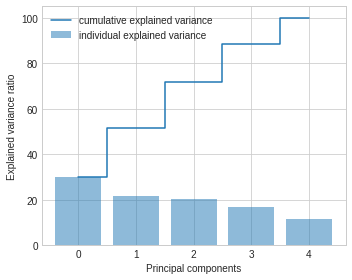

NameError: name 'PCA' is not defined

In [16]:
PCA_generator(data[features_to_keep])

In [ ]:
pca_components(df, nb_components)
PCA_generator(df)

In [ ]:
#remove non significant data
#apply PCA on the data
#save the dataset

In [ ]:
#do a first modeling 
#correlation matrix if classifier
#do a model classification graph